___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.shape

(9578, 14)

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fico', ylabel='Density'>

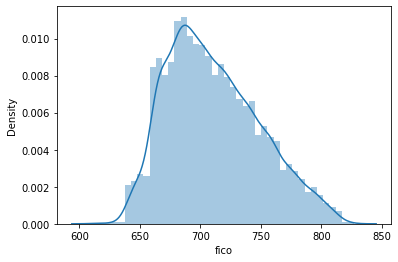

In [8]:
sns.distplot(df['fico'])

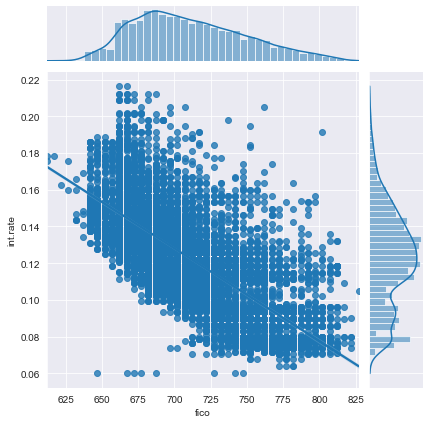

In [10]:
sns.jointplot(data=df, x="fico", y="int.rate", kind="reg")

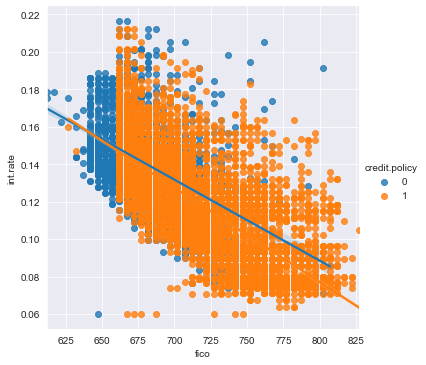

In [17]:
sns.lmplot(x="fico", y="int.rate", hue="credit.policy", data=df)

In [14]:
text_features = ['purpose']
dummies = pd.get_dummies(data=df, columns=text_features)
dummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [80]:
X = df[['int.rate', 'log.annual.inc', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = df['fico']

In [10]:
#pip install sklearn

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
dict_with_result = {}

In [83]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [84]:
lm.coef_

array([-8.07811725e+02,  5.92279405e+00, -1.96202500e-01,  2.17672381e-03,
        3.10529174e-05, -3.46084064e-01])

In [85]:
lm.intercept_

753.2329069872027

In [86]:
lm.score(X_train,y_train)

0.6100907411690724

In [87]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
print(model_1.score(X_train, y_train))

dict_with_result['LinearRegression'] = f'Test R^2 = {round(model_1.score(X_test, y_test), 2)} '

0.6100907411690724


In [88]:
model_1.score(X_test,y_test)

0.6208289278524876

In [89]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
int.rate,-807.811725
log.annual.inc,5.922794
dti,-0.196203
days.with.cr.line,0.002177
revol.bal,0.000031
revol.util,-0.346084


In [117]:
#predictions = lm.predict(X_test)
lm.score(X_test, y_test)

0.6208289278524766

In [118]:
predictions

array([771.46604504, 686.62178631, 725.22568505, ..., 689.95604571,
       728.48732839, 698.04826724])

In [119]:
for i in zip(y_train, predictions):
    print(i)

(717, 771.4660450357355)
(697, 686.621786306898)
(657, 725.2256850521485)
(667, 723.8845698700048)
(737, 709.5223715419512)
(752, 698.0293189892684)
(737, 736.7524832327126)
(707, 736.2447189803788)
(767, 705.5131130068353)
(787, 699.0630574110239)
(722, 678.1508627548895)
(692, 706.1479166529308)
(757, 710.4815612718204)
(732, 670.4175336995042)
(727, 676.6733403676569)
(642, 684.8429745194518)
(697, 726.0916080437772)
(662, 702.2405549097127)
(737, 697.6066956768424)
(662, 719.66115415999)
(672, 722.6737430175751)
(727, 748.4270288091041)
(712, 678.9211207581558)
(742, 711.7425132120917)
(697, 719.0309200108753)
(667, 737.7524155882786)
(687, 660.708682524126)
(657, 765.6973681347167)
(672, 652.6428864042488)
(672, 711.0633717848388)
(702, 697.89511384239)
(707, 679.3108789662202)
(712, 665.4662607369623)
(692, 659.8885230742798)
(687, 689.2479219791617)
(707, 722.2660389373327)
(662, 677.6282115864612)
(657, 706.4395151473482)
(692, 738.2931527668733)
(702, 685.2520218667019)
(732, 

(692, 717.5372553117772)
(757, 752.2143889691807)
(687, 696.2972988762766)
(652, 763.8524813231585)
(752, 670.8118094897644)
(707, 729.9333239442412)
(667, 689.0958775810914)
(797, 740.7184261913166)
(682, 676.446004269017)
(692, 679.3844614419871)
(672, 695.7108399317265)
(767, 685.2392451639848)
(737, 718.9641173426552)
(742, 691.8880499727078)
(732, 702.4078956463447)
(692, 748.2918556187768)
(652, 694.0766822952282)
(732, 656.0010988143454)
(737, 766.3333505165903)
(767, 748.0391526088313)
(687, 672.8444818311646)
(732, 677.0548939673723)
(687, 685.205629905697)
(672, 696.6014528381132)
(652, 693.9569242696826)
(762, 694.8687685271909)
(727, 706.4412530486757)
(727, 691.0543395993489)
(742, 706.513769705068)
(707, 636.684804183129)
(707, 675.4763072010583)
(797, 670.865145863746)
(752, 693.8934734358605)
(677, 709.7370820686862)
(682, 702.3554770449076)
(757, 735.1503105845248)
(697, 670.9539807723781)
(682, 739.970138770723)
(802, 765.8724203930017)
(797, 669.9854407203817)
(687, 

In [120]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.388497665218896
MSE: 558.4651093109012
RMSE: 23.631866394995154


In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(max_depth=4)
model_2.fit(X_train, y_train)
print(model_2.score(X_train, y_train))

dict_with_result['DecisionTreeRegressor'] = f'Test R^2 = {round(model_2.score(X_test, y_test), 2)} '

0.638555634740089


In [92]:
model_2.score(X_test,y_test)

0.6170184477087786

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [131]:
predictions = dtree.predict(X_test)

In [133]:
from sklearn import metrics
result = metrics.classification_report(y_test, predictions)
print(result)

              precision    recall  f1-score   support

         617       0.00      0.00      0.00         1
         627       0.00      0.00      0.00         0
         632       0.00      0.00      0.00         2
         637       0.00      0.00      0.00         0
         642       0.03      0.04      0.03        28
         647       0.11      0.10      0.11        39
         652       0.14      0.16      0.15        38
         657       0.10      0.06      0.08        48
         662       0.16      0.20      0.17       127
         667       0.08      0.09      0.09       117
         672       0.15      0.15      0.15       123
         677       0.10      0.10      0.10       126
         682       0.20      0.15      0.17       176
         687       0.09      0.09      0.09       158
         692       0.10      0.12      0.11       138
         697       0.14      0.12      0.13       156
         702       0.07      0.07      0.07       147
         707       0.10    

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [135]:
metrics.confusion_matrix(y_test,predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [136]:
metrics.accuracy_score(y_test,predictions)

0.09986082115518441

In [98]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)
print(model_3.score(X_train, y_train))

dict_with_result['RandomForestRegressor'] = f'Test R^2 = {round(model_3.score(X_test, y_test), 2)} '

0.9582819004169172


In [99]:
model_3.score(X_test,y_test)

0.709408172004006

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=40)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=40)

In [101]:
rfc_pred = rfc.predict(X_test)

In [102]:
int(confusion_matrix(y_test,rfc_pred))

TypeError: only size-1 arrays can be converted to Python scalars

In [103]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         617       0.00      0.00      0.00         1
         632       0.00      0.00      0.00         2
         642       0.08      0.04      0.05        28
         647       0.00      0.00      0.00        39
         652       0.10      0.05      0.07        38
         657       0.33      0.04      0.07        48
         662       0.17      0.28      0.21       127
         667       0.13      0.22      0.16       117
         672       0.08      0.06      0.07       123
         677       0.09      0.10      0.09       126
         682       0.13      0.11      0.12       176
         687       0.11      0.19      0.14       158
         692       0.11      0.13      0.12       138
         697       0.11      0.07      0.08       156
         702       0.06      0.04      0.05       147
         707       0.09      0.14      0.11       113
         712       0.07      0.07      0.07       108
         717       0.10    

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [105]:
!pip install xgboost

You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [106]:
import xgboost as xgb

In [108]:
from sklearn import linear_model

In [110]:
logistic_regression_model = linear_model.LogisticRegression()

In [111]:
logistic_regression_model 

LogisticRegression()

In [112]:
xgboost_model = xgb.XGBClassifier(n_estimators=100)

In [39]:
xgboost_model

NameError: name 'xgboost_model' is not defined

In [23]:
dict_with_result

{'LinearRegression': 'Test R^2 = 0.04 ',
 'DecisionTreeRegressor': 'Test R^2 = 0.03 ',
 'RandomForestRegressor': 'Test R^2 = -0.01 '}

In [129]:
from sklearn.ensemble import VotingRegressor

Model_1 = LinearRegression()
model_2 = DecisionTreeRegressor()
model_3 = RandomForestRegressor()

er = VotingRegressor([('m1', model_1), ('m2', model_2), ('m3', model_3)])
er.fit(X_train, y_train)
er.score(X_test, y_test)

0.6739310966918219

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"